# Import Scikit Learn, Pandas and Numpy

In [1]:
import sklearn
import numpy as np
import pandas as pd

# 1. Read the Dataset using Pandas

In [2]:
data = pd.read_csv("people_wiki.csv")

In [3]:
data

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...
...,...,...,...
59066,<http://dbpedia.org/resource/Olari_Elts>,Olari Elts,olari elts born april 27 1971 in tallinn eston...
59067,<http://dbpedia.org/resource/Scott_F._Crago>,Scott F. Crago,scott francis crago born july 26 1963 twin bro...
59068,<http://dbpedia.org/resource/David_Cass_(footb...,David Cass (footballer),david william royce cass born 27 march 1962 in...
59069,<http://dbpedia.org/resource/Keith_Elias>,Keith Elias,keith hector elias born february 3 1972 in lac...


# 2. Exploratory Data Analysis

In [4]:
data.head()

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59071 entries, 0 to 59070
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URI     59071 non-null  object
 1   name    59071 non-null  object
 2   text    59071 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


In [6]:
data.describe()

,URI,name,text
count,59071,59071,59071
unique,59071,59070,59071
top,<http://dbpedia.org/resource/Stefan_Pastuszewski>,author),adam burrows is a professor of astrophysical s...
freq,1,2,1


# 3. Data Preprocessing
## Build word count vectors

In [7]:
import pandas as pd
import numpy as np    
from sklearn.feature_extraction.text import CountVectorizer

def dictionarize(row):
    cv = CountVectorizer(
        analyzer = "word",  
    )
    text = [row.loc['text']]
    cv_fit=cv.fit_transform(text)    
    word_list = cv.get_feature_names()
    count_list = cv_fit.toarray().sum(axis=0)
    dictionary = dict(zip(word_list,count_list))
    row['word_count'] = dictionary
    return row

data = data.apply(dictionarize, axis=1)

In [8]:
data.head()

,URI,name,text,word_count
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,"{'10': 1, '1979': 1, '19982000': 1, '2000': 1,..."
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,"{'1973': 1, '1981': 1, '2005': 1, '24hour': 1,..."
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...,"{'1982': 1, '1995': 1, '2010': 1, '2014': 2, '..."
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...,"{'18': 1, '1942': 1, '1963': 1, '1969': 1, '19..."
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...,"{'18': 1, '1974': 1, '1996': 1, '1998': 1, '20..."


## Build TF-IDF vector

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

tfv = TfidfVectorizer(stop_words = 'english')
tfv.fit(data['text'])
feature_names = tfv.get_feature_names()

In [10]:
def dictionarize_TFIDF(row):
    tfv_matrix= tfv.transform([row['text']]).todense()
    feature_index = tfv_matrix[0,:].nonzero()[1]
    dictionary = dict(zip([feature_names[i] for i in feature_index], [tfv_matrix[0, x] for x in feature_index]))
    row['word_TFIDF'] = dictionary
    return row

data = data.apply(dictionarize_TFIDF, axis=1)
data.head()

,URI,name,text,word_count,word_TFIDF
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,"{'10': 1, '1979': 1, '19982000': 1, '2000': 1,...","{'10': 0.03598092475264841, '1979': 0.03910102..."
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,"{'1973': 1, '1981': 1, '2005': 1, '24hour': 1,...","{'1973': 0.03471899418271915, '1981': 0.032801..."
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...,"{'1982': 1, '1995': 1, '2010': 1, '2014': 2, '...","{'1982': 0.043443403994698836, '1995': 0.03932..."
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...,"{'18': 1, '1942': 1, '1963': 1, '1969': 1, '19...","{'18': 0.03144700717270383, '1942': 0.04308025..."
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...,"{'18': 1, '1974': 1, '1996': 1, '1998': 1, '20...","{'18': 0.031973284431831964, '1974': 0.0323498..."


## Explore some examples

In [11]:
def explore_by_name(name, sort_type='word_TFIDF'):
    tfidf = data.loc[data['name'] == name].to_dict('list')['word_TFIDF'][0]
    count = data.loc[data['name'] == name].to_dict('list')['word_count'][0]
    result = pd.DataFrame({'word_TFIDF':pd.Series(tfidf),'word_count':pd.Series(count)})\
                                    .sort_values(by=[sort_type], ascending=False)
    return result

In [12]:
obama = explore_by_name('Barack Obama')
obama.head(10)

,word_TFIDF,word_count
obama,0.413495,9
act,0.282170,8
iraq,0.171970,4
law,0.163903,6
control,0.149369,4
ordered,0.138633,3
military,0.135368,4
democratic,0.129792,4
response,0.124821,3
involvement,0.124821,3


In [13]:
clooney = explore_by_name('George Clooney')
clooney.head(10)

,word_TFIDF,word_count
clooney,0.350758,4
thriller,0.241411,4
drama,0.179177,4
actor,0.161696,4
comedydrama,0.152711,2
er,0.150785,2
comedy,0.137679,3
academy,0.137075,4
film,0.123915,4
producingclooney,0.115349,1


In [14]:
john = explore_by_name('Elton John', 'word_count')
john.head(10)

,word_TFIDF,word_count
the,NaN,27
in,NaN,18
and,NaN,15
of,NaN,13
has,NaN,9
he,NaN,7
john,0.217082,7
on,NaN,6
since,NaN,5
for,NaN,5


In [15]:
john = explore_by_name('Elton John')
john.head(10)

,word_TFIDF,word_count
billboard,0.220815,4
john,0.217082,7
elton,0.212174,3
furnish,0.208194,2
songwriters,0.137278,2
award,0.136446,5
aids,0.127077,2
million,0.124955,3
100,0.123607,3
palace,0.122427,2


## Manual Cosine distance

In [16]:
from sklearn.metrics.pairwise import cosine_distances
import seaborn as sns
import matplotlib.pyplot as plt

def cosine_distance_by_text(names):
    texts = []
    for name in names:
        texts.append(data.loc[data['name'] == name].to_dict('list')['text'][0])
    
    tfv_matrix = tfv.transform(texts).todense()
    distance = cosine_distances(tfv_matrix, tfv_matrix)
    distance = pd.DataFrame(distance, index=names, columns=names)
    ax = sns.heatmap(distance, center=0)
    return distance

,Bill Clinton,Barack Obama,David Beckham,Victoria Beckham,Elton John,Paul McCartney
Bill Clinton,0.000000,0.811033,0.962792,0.990261,0.967256,0.979568
Barack Obama,0.811033,0.000000,0.974434,0.986954,0.966053,0.988396
David Beckham,0.962792,0.974434,0.000000,0.575420,0.943908,0.964789
Victoria Beckham,0.990261,0.986954,0.575420,0.000000,0.965930,0.959338
Elton John,0.967256,0.966053,0.943908,0.965930,0.000000,0.810086
Paul McCartney,0.979568,0.988396,0.964789,0.959338,0.810086,0.000000


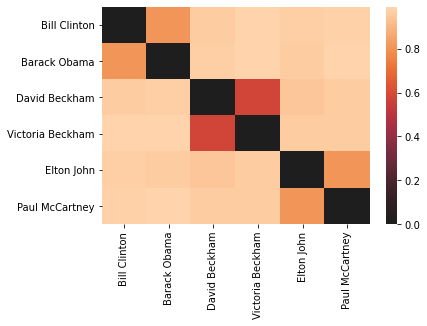

In [17]:
texts = ['Bill Clinton', 'Barack Obama', 'David Beckham', 'Victoria Beckham', 'Elton John','Paul McCartney']

cosine_distance_by_text(texts)

# 4. Unsupervised Learning Pipeline

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

preprocessor = Pipeline(
    [
        ('TFIDF_Vectorizer', TfidfVectorizer()),
        ('TF-IDF', TfidfTransformer())
    ],
    verbose=True
)

kmeans_model = Pipeline(
    [
        ('Preprocessor', preprocessor),
        ('KMeans', KMeans())
    ],
    verbose=True
)

from sklearn import set_config
set_config(display='diagram')
kmeans_model

Pipeline(steps=[('Preprocessor',
                 Pipeline(steps=[('TFIDF_Vectorizer', TfidfVectorizer()),
                                 ('TF-IDF', TfidfTransformer())],
                          verbose=True)),
                ('KMeans', KMeans())],
         verbose=True)

# 5. Pipeline Tuning

In [19]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 11):
    print("Starting with n_clusters=", k)
    kmeans_model = Pipeline(
        [
            ('Preprocessor', preprocessor),
            ('KMeans', KMeans(n_clusters=k))
        ],
        verbose=True
    )
    
    kmeans_model.fit(data['text'])
    preprocessed_data = preprocessor.transform(data['text'])
    print("Pipeline fit finished")
    score = silhouette_score(preprocessed_data, kmeans_model["KMeans"].labels_)
    print("silhouette score finished")
    print()
    silhouette_coefficients.append(score)

Starting with n_clusters= 2
[Pipeline] .. (step 1 of 2) Processing TFIDF_Vectorizer, total=  19.2s
[Pipeline] ............ (step 2 of 2) Processing TF-IDF, total=   1.6s
[Pipeline] ...... (step 1 of 2) Processing Preprocessor, total=  20.8s
[Pipeline] ............ (step 2 of 2) Processing KMeans, total=  36.3s
Pipeline fit finished
silhouette score finished

Starting with n_clusters= 3
[Pipeline] .. (step 1 of 2) Processing TFIDF_Vectorizer, total=  17.7s
[Pipeline] ............ (step 2 of 2) Processing TF-IDF, total=   0.7s
[Pipeline] ...... (step 1 of 2) Processing Preprocessor, total=  18.4s
[Pipeline] ............ (step 2 of 2) Processing KMeans, total= 1.1min
Pipeline fit finished
silhouette score finished

Starting with n_clusters= 4
[Pipeline] .. (step 1 of 2) Processing TFIDF_Vectorizer, total=  17.3s
[Pipeline] ............ (step 2 of 2) Processing TF-IDF, total=   0.9s
[Pipeline] ...... (step 1 of 2) Processing Preprocessor, total=  18.2s
[Pipeline] ............ (step 2 of 2)

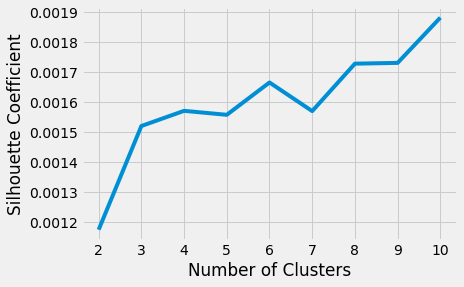

In [20]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Retrain the model with the best scoring number of clusters

In [21]:
k_best = np.argmax(silhouette_coefficients) + 2

kmeans_model = Pipeline(
    [
        ('Preprocessor', preprocessor),
        ('KMeans', KMeans(n_clusters=k_best, max_iter=500))
    ],
    verbose=True
)

kmeans_model.fit(data['text'])

[Pipeline] .. (step 1 of 2) Processing TFIDF_Vectorizer, total=  18.8s
[Pipeline] ............ (step 2 of 2) Processing TF-IDF, total=   0.7s
[Pipeline] ...... (step 1 of 2) Processing Preprocessor, total=  19.4s
[Pipeline] ............ (step 2 of 2) Processing KMeans, total= 3.2min


Pipeline(steps=[('Preprocessor',
                 Pipeline(steps=[('TFIDF_Vectorizer', TfidfVectorizer()),
                                 ('TF-IDF', TfidfTransformer())],
                          verbose=True)),
                ('KMeans', KMeans(max_iter=500, n_clusters=10))],
         verbose=True)

# Assignment
### Build Nearest Neighbor Pipelines to measure distance between persons using CountVector and TFIDF

In [22]:
from sklearn.neighbors import NearestNeighbors

distance_knn_count = Pipeline(
    [
        ('Count_Vectorizer', CountVectorizer()),
        ('NN', NearestNeighbors(metric='cosine'))
    ],
    verbose=True
)

distance_knn_tfidf = Pipeline(
    [
        ('TFIDF_Vectorizer', TfidfVectorizer()),
        ('TF-IDF', TfidfTransformer()),
        ('NN', NearestNeighbors(metric='cosine'))
    ],
    verbose=True
)

In [23]:
distance_knn_count.fit(data['text'])

[Pipeline] .. (step 1 of 2) Processing Count_Vectorizer, total=  18.5s
[Pipeline] ................ (step 2 of 2) Processing NN, total=   0.0s


Pipeline(steps=[('Count_Vectorizer', CountVectorizer()),
                ('NN', NearestNeighbors(metric='cosine'))],
         verbose=True)

In [24]:
distance_knn_tfidf.fit(data['text'])

[Pipeline] .. (step 1 of 3) Processing TFIDF_Vectorizer, total=  19.1s
[Pipeline] ............ (step 2 of 3) Processing TF-IDF, total=   0.8s
[Pipeline] ................ (step 3 of 3) Processing NN, total=   0.0s


Pipeline(steps=[('TFIDF_Vectorizer', TfidfVectorizer()),
                ('TF-IDF', TfidfTransformer()),
                ('NN', NearestNeighbors(metric='cosine'))],
         verbose=True)

In [25]:
def query_distance_count(name):
    x = data.loc[data['name'] == name].to_dict('list')['text'][0]
    x = distance_knn_count['Count_Vectorizer'].transform([x])
    y = distance_knn_count['NN'].kneighbors(x)
    
    for i in y[1]:
        print(data.loc[i]['name'])
        
def query_distance_tfidf(name):
    x = data.loc[data['name'] == name].to_dict('list')['text'][0]
    x = distance_knn_tfidf['TFIDF_Vectorizer'].transform([x])
    y = distance_knn_count['NN'].kneighbors(x)
    
    for i in y[1]:
        print(data.loc[i]['name'])

In [26]:
name = 'Elton John'
query_distance_count(name)

19923        Elton John
41668     Cliff Richard
25798    Sandro Petrone
28825       Rod Stewart
37447     Roger Daltrey
Name: name, dtype: object


In [27]:
name = 'Elton John'
query_distance_tfidf(name)

19923             Elton John
28825            Rod Stewart
29297         Kelly Clarkson
17505         George Michael
16423    Usher (entertainer)
Name: name, dtype: object


In [28]:
name = 'Victoria Beckham'
query_distance_count(name)

50411            Victoria Beckham
669      Mary Fitzgerald (artist)
45129              Adrienne Corri
39504            Beverly Jane Fry
13937               Raman Mundair
Name: name, dtype: object


In [29]:
name = 'Victoria Beckham'
query_distance_tfidf(name)

50411     Victoria Beckham
23386        David Beckham
56064    Yuliya Polishchuk
58438     Mona al Mansouri
6635     Wal%C3%A9 Adeyemi
Name: name, dtype: object
